<a href="https://colab.research.google.com/github/YaredMekonnen/CardDeck/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#you should be able to run this without any issue.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/cs167reza/vehicles.csv'

vehicles = pd.read_csv(path)
subset = vehicles[vehicles['fuelType'] == 'Regular']

<ipython-input-28-00d26f132b36>:4: DtypeWarning: Columns (71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv(path)


In [ ]:
subset2 = subset[['year','cylinders','displ','comb08']]
subset2_no_missing_data = subset2.isna().any().dropna()
subset2_no_missing_data.head()

year         False
cylinders     True
displ         True
comb08       False
dtype: bool

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
path = '/content/drive/MyDrive/cs167reza/vehicles.csv'
vehicles = pd.read_csv(path)

# Filter the dataset for 'Regular' fuel type
subset = vehicles[vehicles['fuelType'] == 'Regular']

# Select relevant columns for regression
subset2 = subset[['year', 'cylinders', 'displ', 'comb08']]

# Check for missing data
subset2_no_missing_data = subset2.dropna()

# Split the data into features (X) and target variable (y)
X = subset2_no_missing_data[['year', 'cylinders', 'displ']]
y = subset2_no_missing_data['comb08']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 12.56062504548937


<ipython-input-30-388518d20adb>:16: DtypeWarning: Columns (71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv(path)


In [ ]:


# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.6365644297504194


In [ ]:
# Shuffle the dataset
vehicles_shuffled = vehicles.sample(frac=1, random_state=42)  # Shuffle the dataset

# Filter the dataset for 'Regular' fuel type
subset = vehicles_shuffled[vehicles_shuffled['fuelType'] == 'Regular']

# Select relevant columns for regression
subset2 = subset[['year', 'cylinders', 'displ', 'comb08']]

# Check for missing data
subset2_no_missing_data = subset2.dropna()

# Split the data into features (X) and target variable (y)
X = subset2_no_missing_data[['year', 'cylinders', 'displ']]
y = subset2_no_missing_data['comb08']

# Use the first approximately 500 rows as testing data
X_test = X.iloc[:500]
y_test = y.iloc[:500]

# Use the remaining data for training
X_train = X.iloc[500:]
y_train = y.iloc[500:]

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.298515813646919


<ipython-input-33-b24dc84938d5>:3: DtypeWarning: Columns (71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv(path)


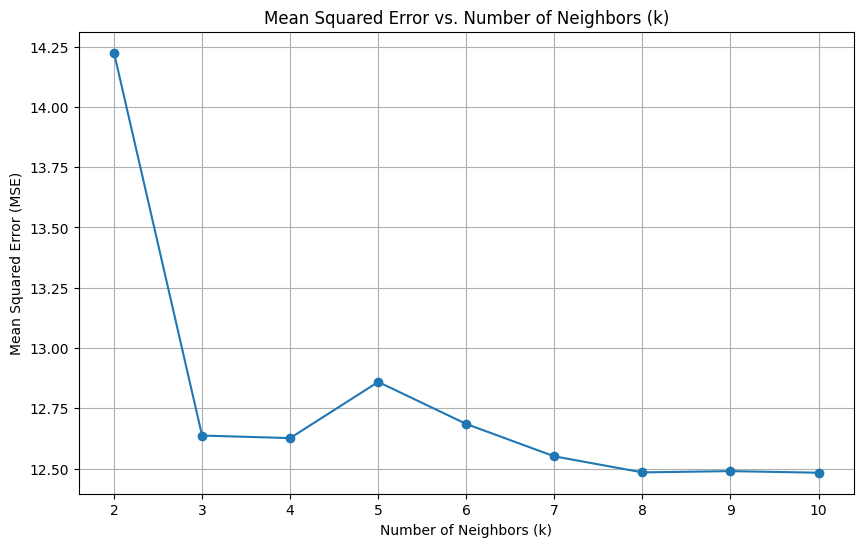

In [ ]:


# Load the dataset
path = '/content/drive/MyDrive/cs167reza/vehicles.csv'
vehicles = pd.read_csv(path)

# Filter the dataset for 'Regular' fuel type
subset = vehicles[vehicles['fuelType'] == 'Regular']

# Select relevant columns for regression
subset2 = subset[['year', 'cylinders', 'displ', 'comb08']]

# Check for missing data
subset2_no_missing_data = subset2.dropna()

# Split the data into features (X) and target variable (y)
X = subset2_no_missing_data[['year', 'cylinders', 'displ']]
y = subset2_no_missing_data['comb08']

# Initialize a list to store mean squared errors for different k values
mse_scores = []

# Test the model with different values of k
k_values = range(2, 11)  # Test k from 2 to 10 (at least two splits)
for k in k_values:
    model = LinearRegression()
    # Calculate cross-validation scores using negative mean squared error
    scores = -cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
    mse_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


<ipython-input-34-916606494174>:3: DtypeWarning: Columns (71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv(path)


Split Size: 0.2, Random State: 42, MSE: 12.56062504548937
Split Size: 0.2, Random State: 123, MSE: 12.082890056571589
Split Size: 0.2, Random State: 789, MSE: 14.271422467536516
Split Size: 0.3, Random State: 42, MSE: 12.94367593581084
Split Size: 0.3, Random State: 123, MSE: 12.052287270038503
Split Size: 0.3, Random State: 789, MSE: 13.567804588093285
Split Size: 0.4, Random State: 42, MSE: 12.68811767933252
Split Size: 0.4, Random State: 123, MSE: 12.508402292422097
Split Size: 0.4, Random State: 789, MSE: 13.132675785535596
Split Size: 0.5, Random State: 42, MSE: 12.476958996742564
Split Size: 0.5, Random State: 123, MSE: 12.271109373469288
Split Size: 0.5, Random State: 789, MSE: 12.941957059988237


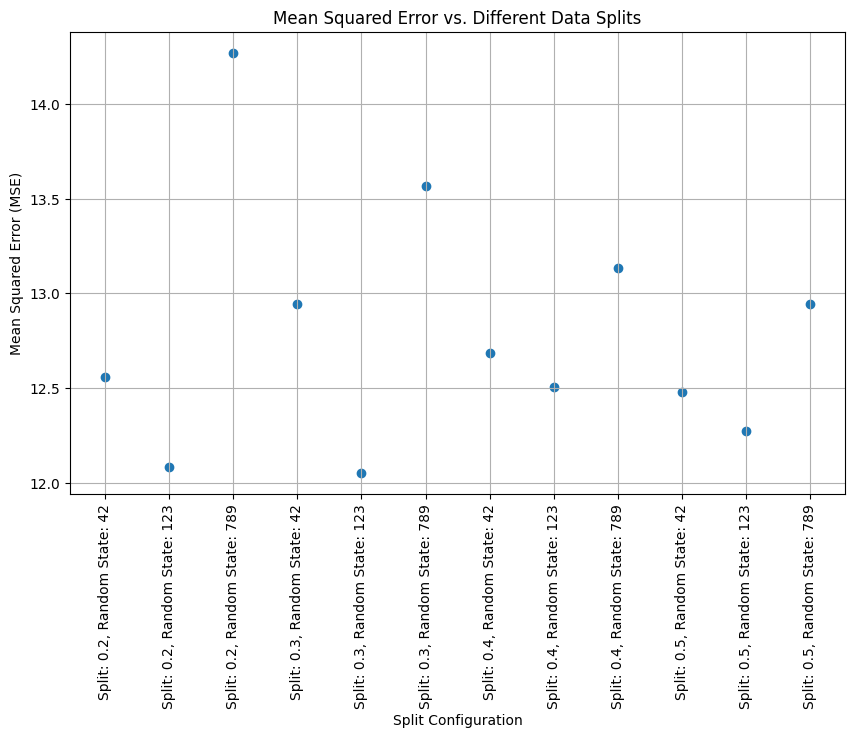

In [ ]:


# Load the dataset
path = '/content/drive/MyDrive/cs167reza/vehicles.csv'
vehicles = pd.read_csv(path)

# Filter the dataset for 'Regular' fuel type
subset = vehicles[vehicles['fuelType'] == 'Regular']

# Select relevant columns for regression
subset2 = subset[['year', 'cylinders', 'displ', 'comb08']]

# Check for missing data
subset2_no_missing_data = subset2.dropna()

# Split the data into features (X) and target variable (y)
X = subset2_no_missing_data[['year', 'cylinders', 'displ']]
y = subset2_no_missing_data['comb08']

# Initialize a list to store mean squared errors for different splits
mse_scores = []

# Test the model with different splits
split_sizes = [0.2, 0.3, 0.4, 0.5]  # Test different split sizes (e.g., 20%, 30%, 40%, 50%)
random_states = [42, 123, 789]  # Test different random_state values
for split_size in split_sizes:
    for random_state in random_states:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

        model = LinearRegression()
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append((split_size, random_state, mse))

# Display the MSE scores for different splits
for split_size, random_state, mse in mse_scores:
    print(f"Split Size: {split_size}, Random State: {random_state}, MSE: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mse_scores)), [mse for _, _, mse in mse_scores], marker='o')
plt.title('Mean Squared Error vs. Different Data Splits')
plt.xlabel('Split Configuration')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(len(mse_scores)), [f"Split: {split_size}, Random State: {random_state}" for split_size, random_state, _ in mse_scores], rotation=90)
plt.grid(True)
plt.show()


In [ ]:
# Split the data into features (X) and target variable (y)
X = subset2_no_missing_data[['year', 'cylinders', 'displ']]
y = subset2_no_missing_data['comb08']

# Define a range of k values to test
param_grid = {'n_neighbors': range(1, 21)}  # Test k from 1 to 20

# Create a kNN regression model
knn = KNeighborsRegressor()

# Perform a grid search with cross-validation to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Print the best value of k
print(f"Best value of k: {best_k}")

Best value of k: 20


In conclusion the best value of k is 20.